In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
    perform_experiments,
    Samplers,
    SequentialEvaluator,
)
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time

In [2]:
dike_model, planning_steps = get_model_for_problem_formulation(6)
experiments = pd.read_csv('DB_results/experiments_robustness.csv')
outcomes = pd.read_csv('DB_results/outcomes_robustness.csv')
outcomes.drop(columns='Unnamed: 0', inplace=True)

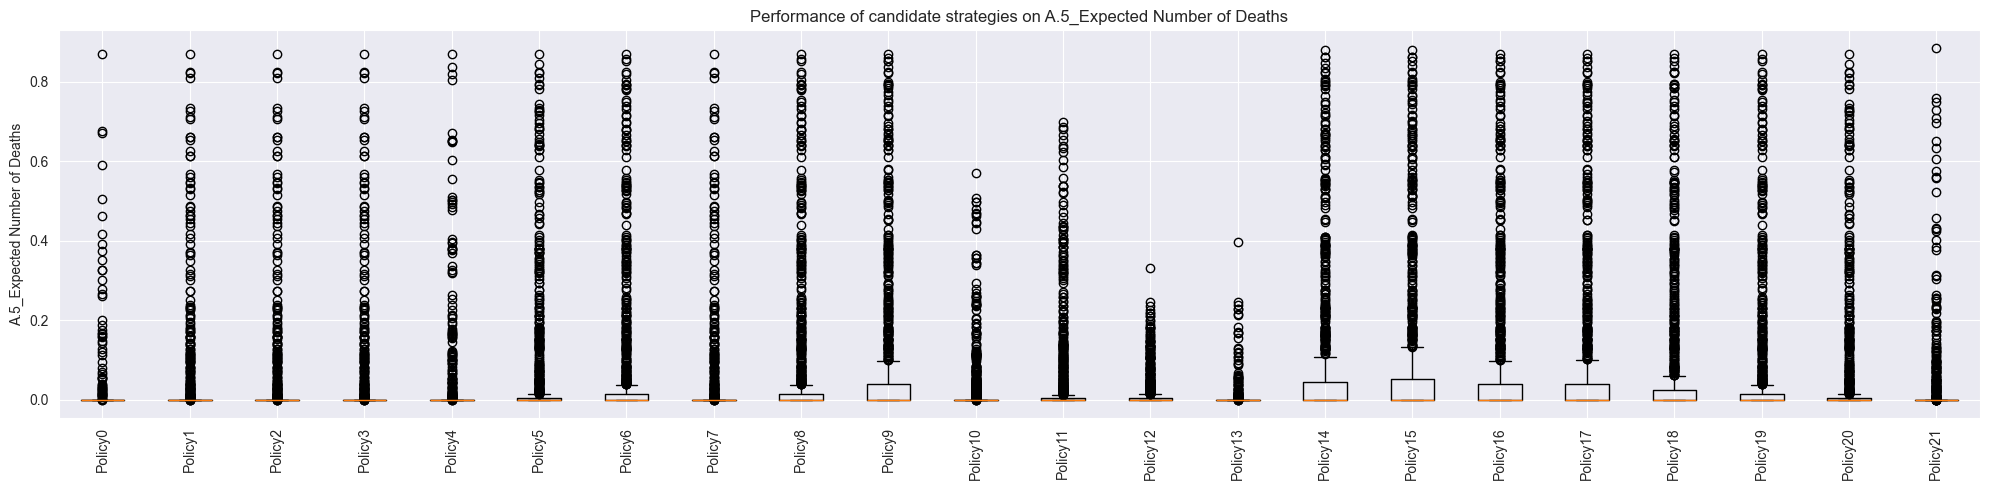

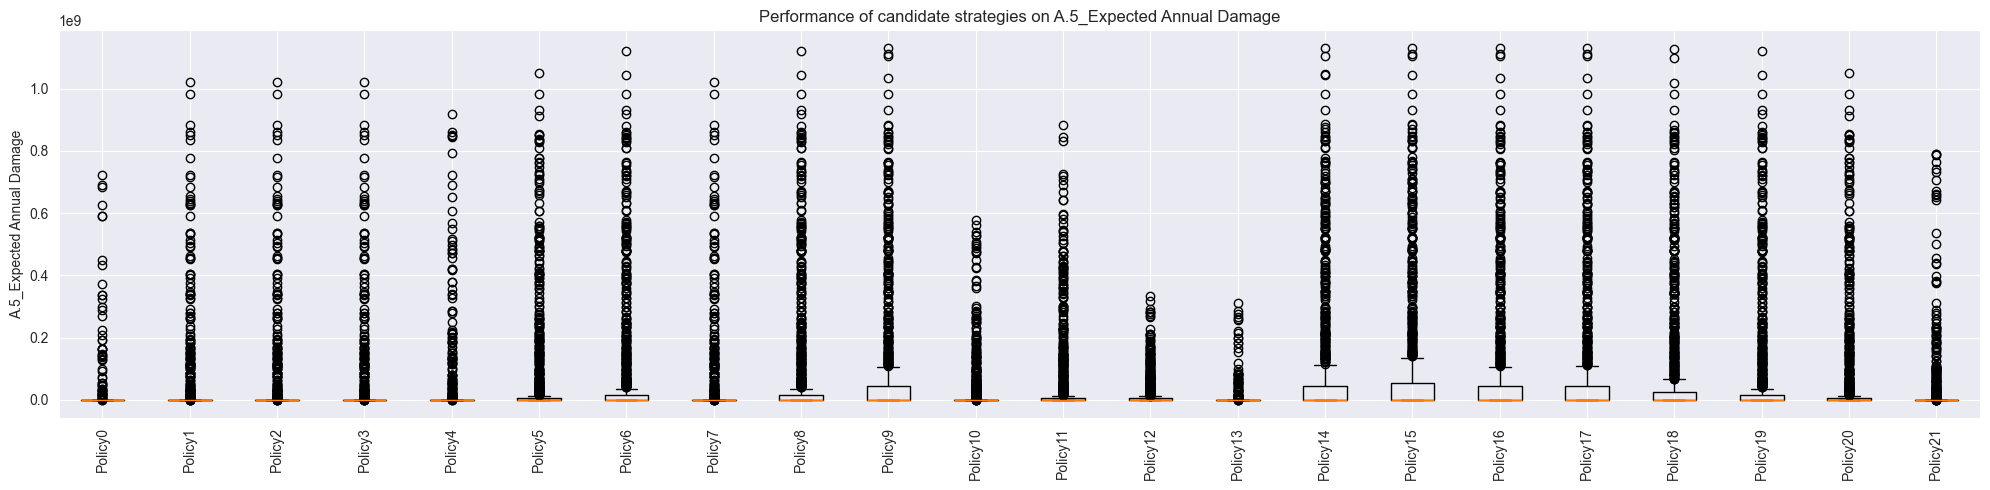

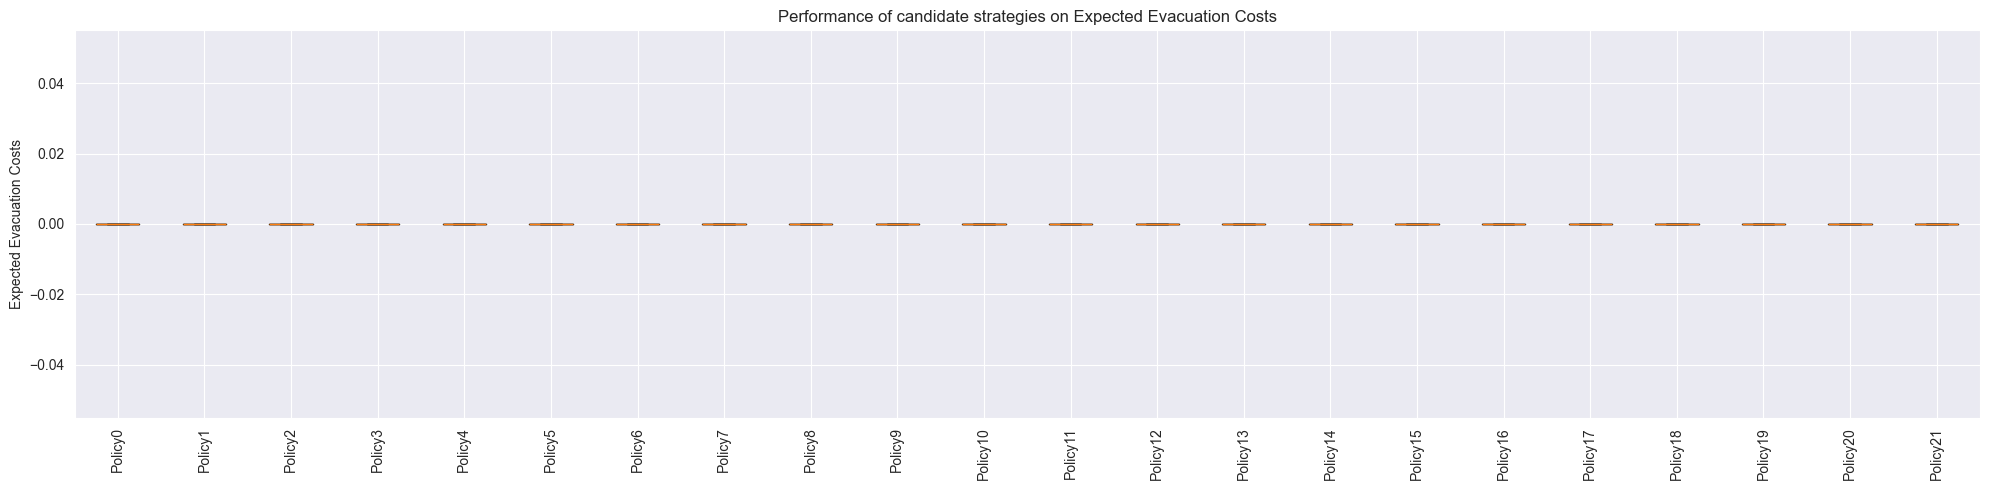

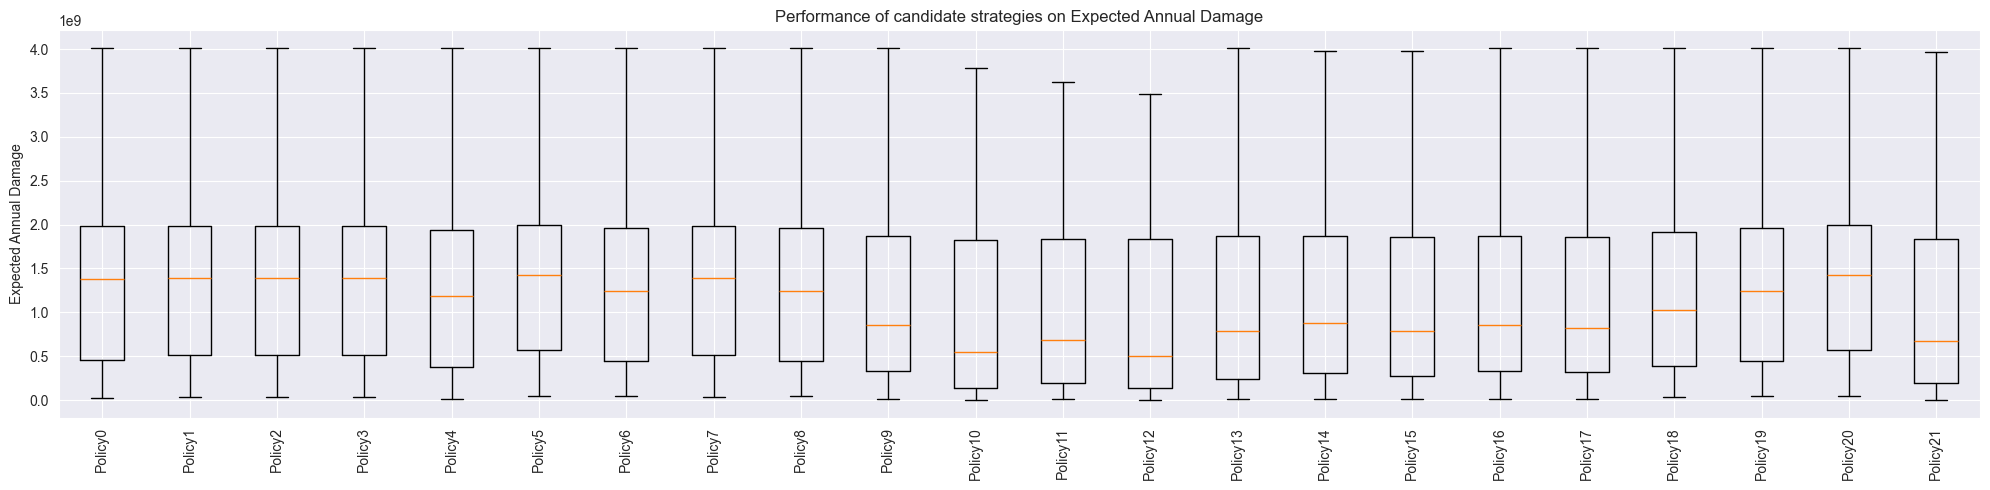

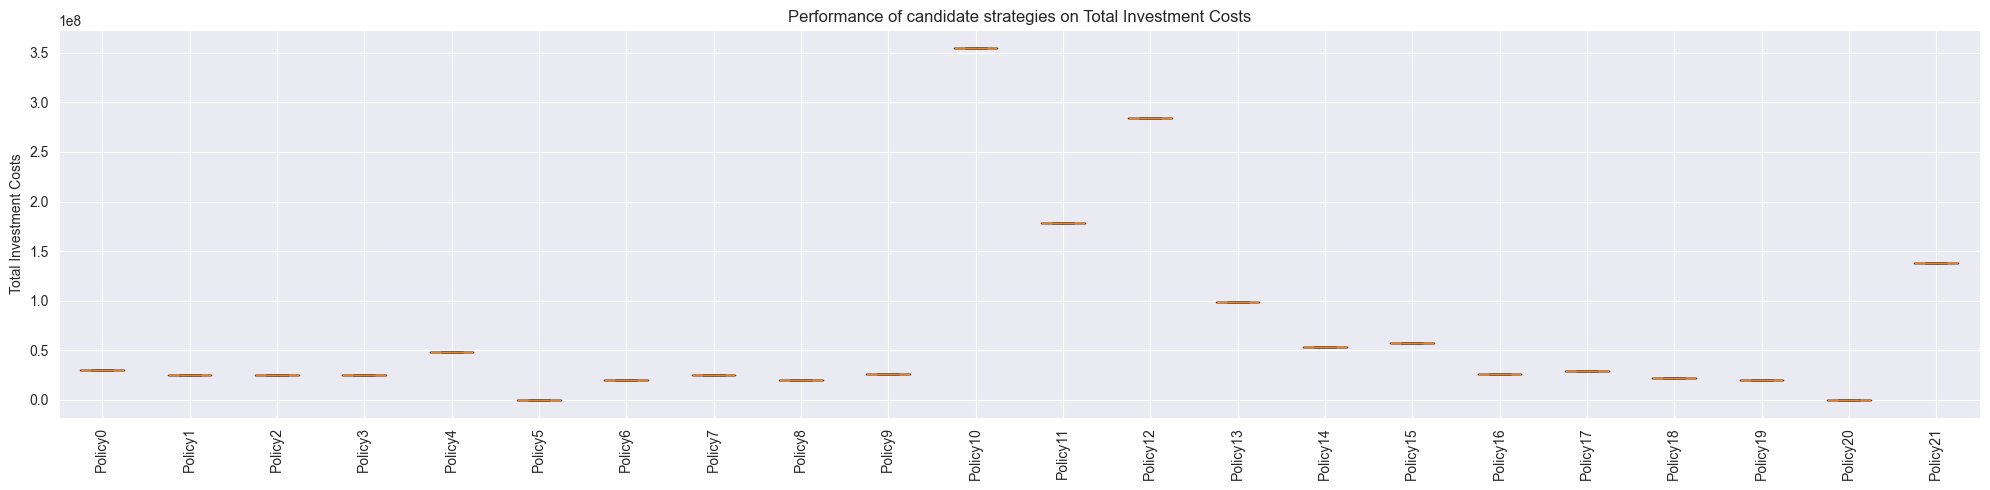

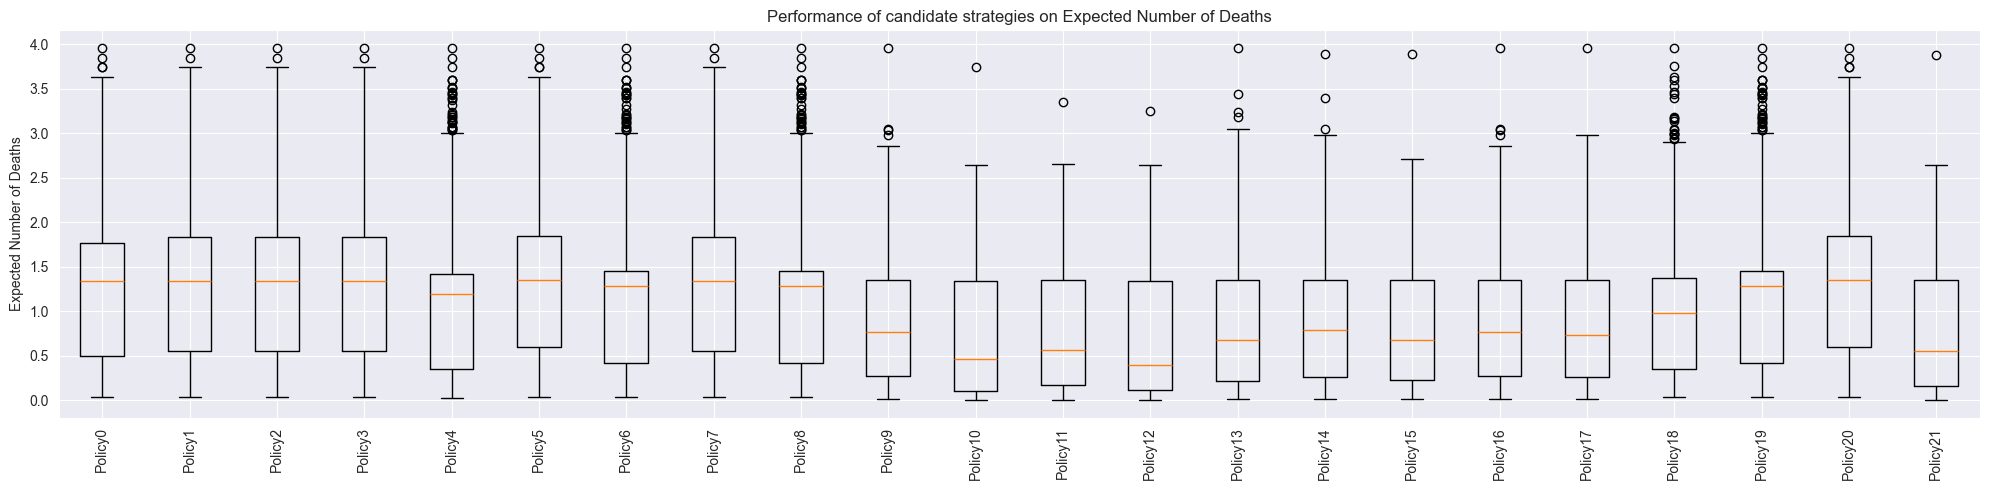

In [7]:
def split_dataframes(dataframe):
    dataframes = []
    for i in range(1000, 22001, 1000):
        start = i - 1000
        end = i
        df = dataframe.iloc[start:end]
        dataframes.append(df)
    return dataframes
    
def compare_boxplots_policies(dataframes, columns, dataframe_labels):   
    for column in columns:
        data = [df[column].dropna() for df in dataframes if column in df.columns]
        plt.figure(figsize=(20, 5))
        plt.boxplot(data, labels=dataframe_labels)
        plt.title(f'Performance of candidate strategies on {column}')
        plt.ylabel(column)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig(f'Performance of candidate strategies on {column}.png')
        plt.show()

# Define the DataFrames and labels
dataframes = split_dataframes(outcomes)
dataframe_labels = [f'Policy{i}' for i in range(len(dataframes))]

# Define the columns to compare
columns_to_compare = list(outcomes.columns)

# Create the boxplots
compare_boxplots_policies(dataframes, columns_to_compare, dataframe_labels)

In [8]:
# percentile_80_A4_deaths = np.percentile(df_outcomes["A.4_Expected Number of Deaths"], 80)
# percentile_80_A4_damage = np.percentile(df_outcomes["A.4_Expected Annual Damage"], 80)
percentile_80_A5_deaths = np.percentile(outcomes["A.5_Expected Number of Deaths"], 80)
percentile_80_A5_damage = np.percentile(outcomes["A.5_Expected Annual Damage"], 80)
percentile_80_TT_deaths = np.percentile(outcomes["Expected Number of Deaths"], 80)
percentile_80_TT_damage = np.percentile(outcomes["Expected Annual Damage"], 80)

# Create the filtered DataFrames
# df_20thA4 = df_outcomes[(df_outcomes["A.4_Expected Number of Deaths"] > percentile_80_A4_deaths) | (df_outcomes["A.4_Expected Annual Damage"] > percentile_80_A4_damage)]
df_20thA5 = outcomes[(outcomes["A.5_Expected Number of Deaths"] > percentile_80_A5_deaths) | (outcomes["A.5_Expected Annual Damage"] > percentile_80_A5_damage)]
df_20thTT = outcomes[(outcomes["Expected Number of Deaths"] > percentile_80_TT_deaths) | (outcomes["Expected Annual Damage"] > percentile_80_TT_damage)]

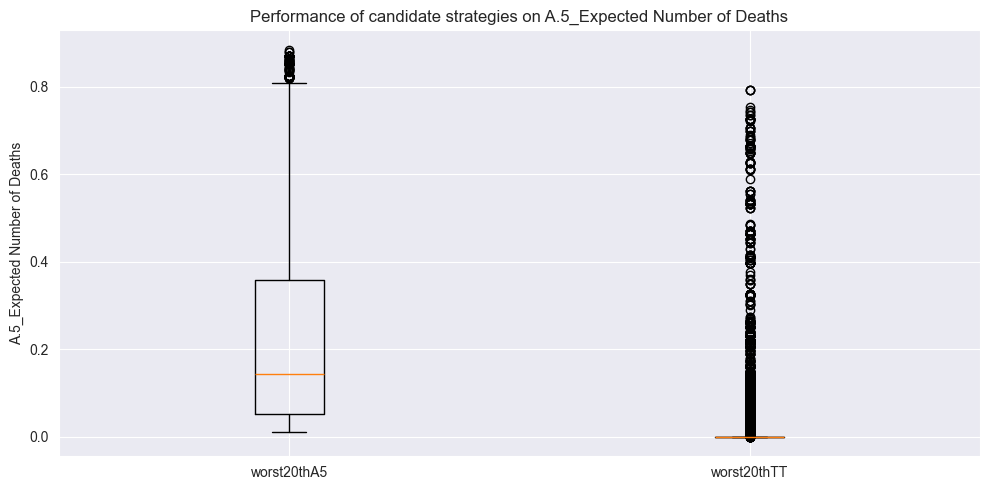

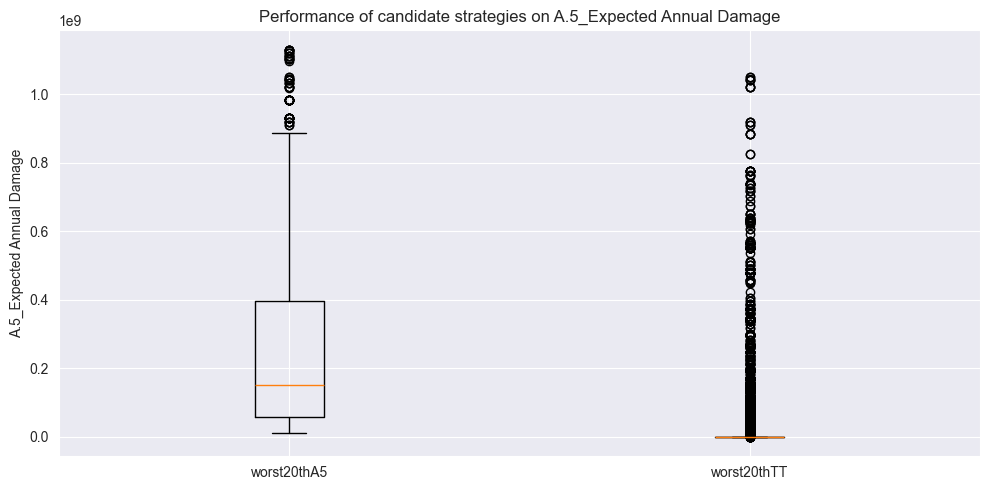

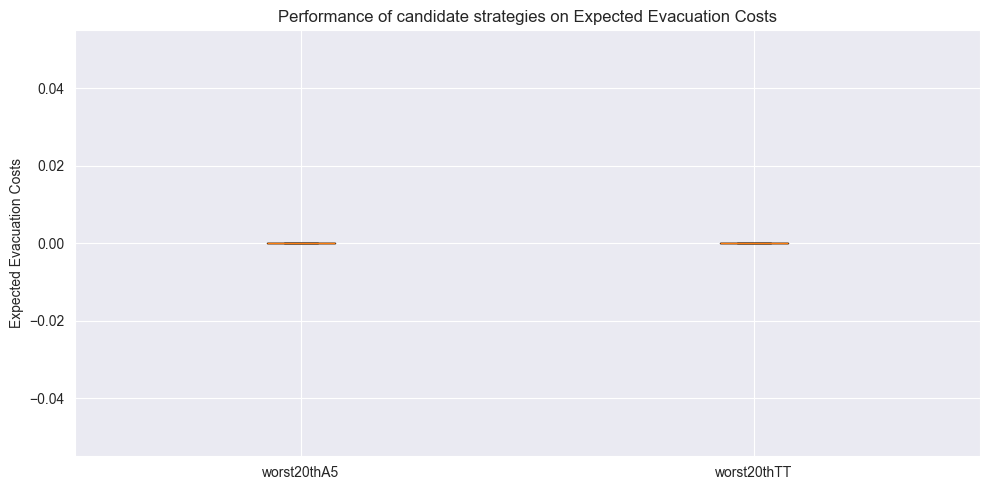

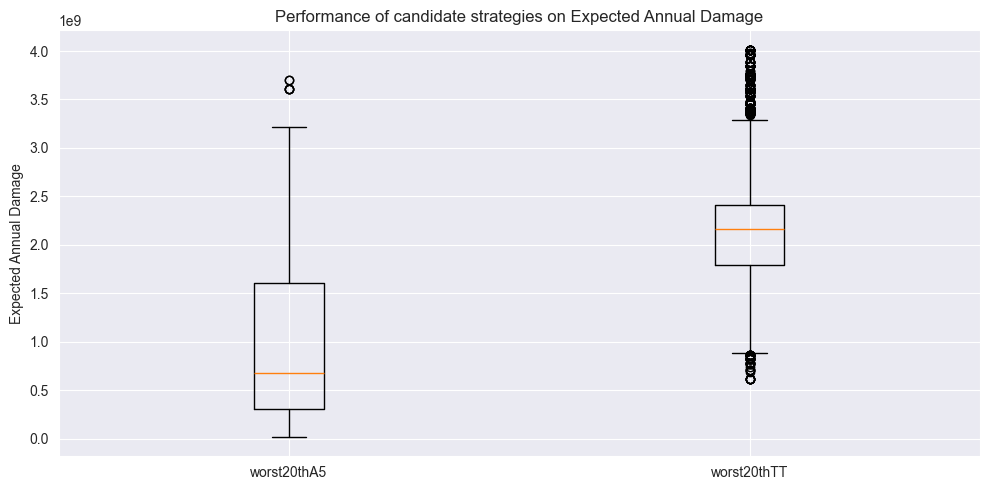

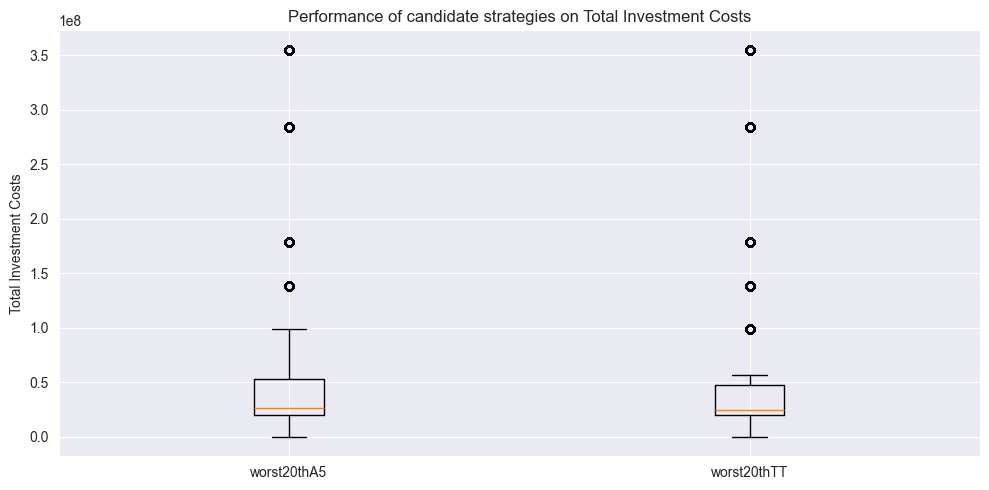

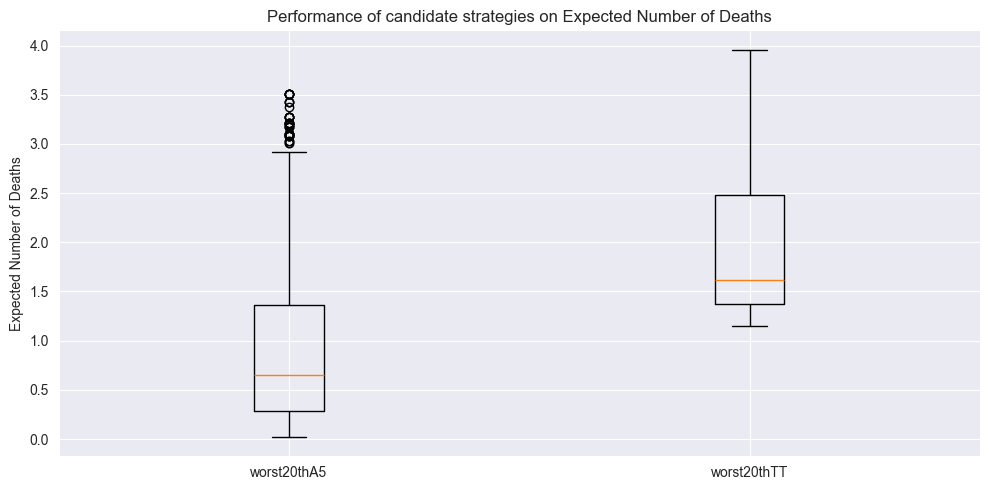

In [10]:
def compare_boxplots_20worst(dataframes, columns, dataframe_labels):   
    for column in columns:
        data = [df[column].dropna() for df in dataframes if column in df.columns]
        plt.figure(figsize=(10, 5))
        plt.boxplot(data, labels=dataframe_labels)
        plt.title(f'Performance of candidate strategies on {column}')
        plt.ylabel(column)
        #plt.xticks(rotation=90)
        plt.tight_layout()
        plt.savefig(f'Performance of candidate strategies on {column}.png')
        plt.show()
        
# Define the DataFrames and labels
dataframes = [df_20thA5, df_20thTT]
dataframe_labels = ['worst20thA5', 'worst20thTT']

# Define the columns to compare
columns_to_compare = list(outcomes.columns)

# Create the boxplots
compare_boxplots_20worst(dataframes, columns_to_compare, dataframe_labels)